In [2]:
# grader-required-cell

import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [40]:
# train_gen = ImageDataGenerator(rescale = 1.0/255,rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,validation_split=0.2, zoom_range=0.2)

train_gen=ImageDataGenerator(rescale = 1.0/255, validation_split=0.2)

train_flow = train_gen.flow_from_directory('Data_v2', class_mode='categorical',
                                           batch_size = 32, shuffle = True,target_size=(80,80),subset='training')

val_flow = train_gen.flow_from_directory('Data_v2', class_mode='categorical',
                                         batch_size = 32, shuffle = True,target_size=(80,80), subset = 'validation')

# val_gen = ImageDataGenerator(rescale = 1.0/255)

# val_flow = val_gen.flow_from_directory('Data_v1/Val', target_size=(80,80), class_mode='categorical',
#                                          batch_size = 32, shuffle = True)


Found 2402 images belonging to 3 classes.


Found 599 images belonging to 3 classes.


In [41]:
train_flow.total_batches_seen

0

In [42]:
def create_model() :
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(80, 80, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    return model

In [43]:
model= create_model()
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 39, 39, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 18, 18, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 8, 8, 64)         

In [45]:
history = model.fit(train_flow, epochs = 3, validation_data=val_flow)

Epoch 1/3
76/76 [==============================] - 6s 80ms/step - loss: 0.0248 - accuracy: 0.9904 - val_loss: 0.1174 - val_accuracy: 0.9466
Epoch 2/3
76/76 [==============================] - 6s 78ms/step - loss: 0.0177 - accuracy: 0.9946 - val_loss: 0.0186 - val_accuracy: 0.9933
Epoch 3/3
76/76 [==============================] - 6s 79ms/step - loss: 0.0137 - accuracy: 0.9950 - val_loss: 0.1640 - val_accuracy: 0.9382


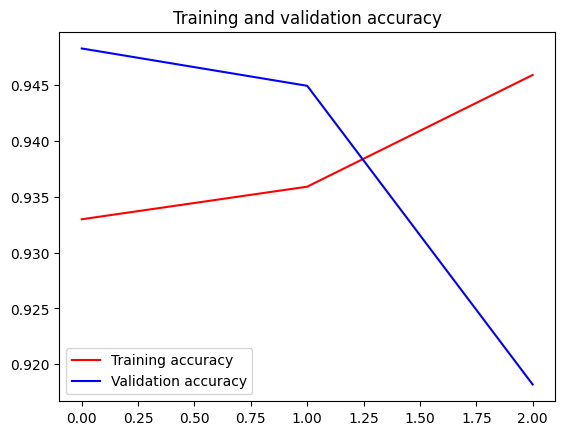

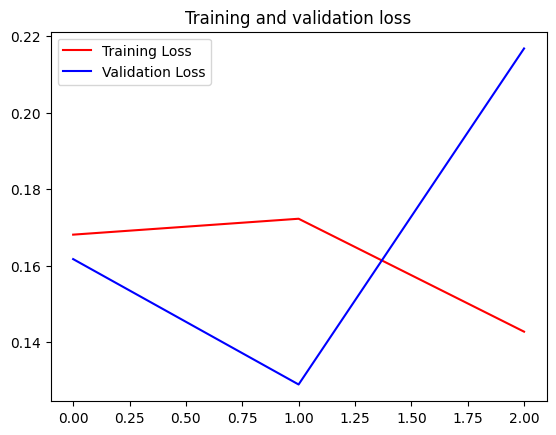

In [12]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
from tensorflow.keras.models import save_model

save_model(model, "./Saved Models/V5.h5")

C:\Users\Anav Agrawal\AppData\Local\Temp\ipykernel_20548\863783581.py:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "./Saved Models/V5.h5")


In [47]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

counter = 90
num = 20

for i in range(num):
    path = str(r'Data_v2\Rock\Image_' + str(counter) + '.jpg')
    image = load_img(path, target_size=(80, 80))
    image = img_to_array(image)
    image = image.reshape((1, 80, 80, 3))

    # Use the same preprocessing as in val_flow
    # image = image/255

    preds = model.predict(image)
    prednum = np.argmax(preds)
    print('Predicted probabilities:', preds)
    print('Predicted class:', prednum)

    counter += 1


1/1 [==============================] - 0s 16ms/step
Predicted probabilities: [[0. 1. 0.]]
Predicted class: 1
1/1 [==============================] - 0s 17ms/step


Predicted probabilities: [[0. 1. 0.]]
Predicted class: 1
1/1 [==============================] - 0s 16ms/step
Predicted probabilities: [[0. 1. 0.]]
Predicted class: 1
1/1 [==============================] - 0s 17ms/step
Predicted probabilities: [[0. 1. 0.]]
Predicted class: 1
1/1 [==============================] - 0s 17ms/step
Predicted probabilities: [[0. 1. 0.]]
Predicted class: 1
1/1 [==============================] - 0s 15ms/step
Predicted probabilities: [[0. 1. 0.]]
Predicted class: 1
1/1 [==============================] - 0s 15ms/step
Predicted probabilities: [[0. 1. 0.]]
Predicted class: 1
1/1 [==============================] - 0s 16ms/step
Predicted probabilities: [[0. 1. 0.]]
Predicted class: 1
1/1 [==============================] - 0s 15ms/step
Predicted probabilities: [[0. 1. 0.]]
Predicted class: 1
1/1 [==============================] - 0s 15ms/step
Predicted probabilities: [[0. 1. 0.]]
Predicted class: 1
1/1 [==============================] - 0s 16ms/step
Predicted probabili

(32, 80, 80, 3)
1/1 [==============================] - 0s 25ms/step


(32, 80, 80, 3)
1/1 [==============================] - 0s 29ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 27ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 28ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 25ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 27ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 26ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 31ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 29ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 27ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 30ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 29ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 33ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 31ms/step
(32, 80, 80, 3)
1/1 [==============================] - 0s 29ms/step
(32, 80, 80, 3)
1/1 [===========================

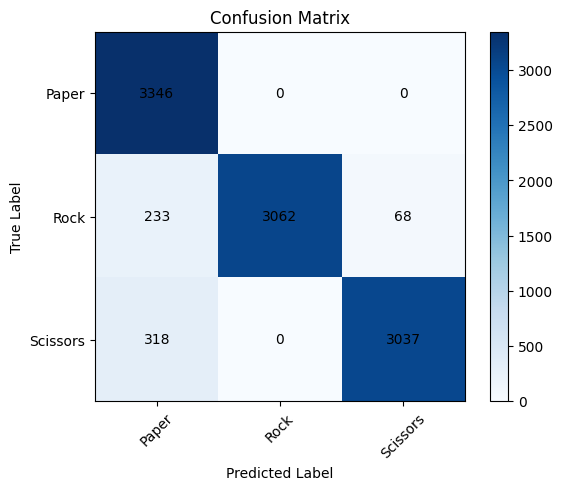

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Assuming you already have the model loaded and the val_flow is set up
# Get true labels and predicted labels for the validation set

true_labels = []
predicted_labels = []

start_time = time.time()
max_duration = 20  # 2 minutes in seconds

# Predict on the validation set
for batch in val_flow:
    images, labels = batch
    true_labels.extend(np.argmax(labels, axis=1))
    print(images.shape)
    predicted_probs = model.predict(images)
    predicted_labels.extend(np.argmax(predicted_probs, axis=1))

    # Check elapsed time
    elapsed_time = time.time() - start_time
    if elapsed_time >= max_duration:
        break

# Compute the confusion matrix
num_classes = len(val_flow.class_indices)
cm = np.zeros((num_classes, num_classes), dtype=int)
for true_label, predicted_label in zip(true_labels, predicted_labels):
    cm[true_label][predicted_label] += 1

# Display the confusion matrix
classes = list(val_flow.class_indices.keys())
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


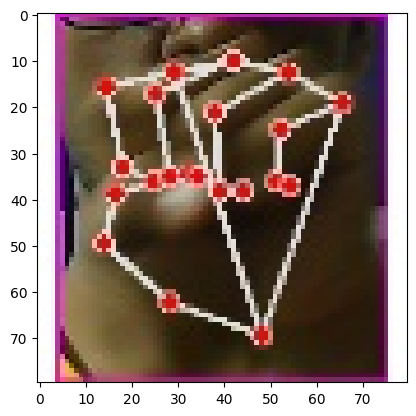

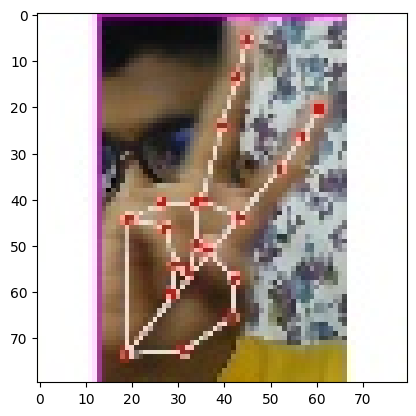

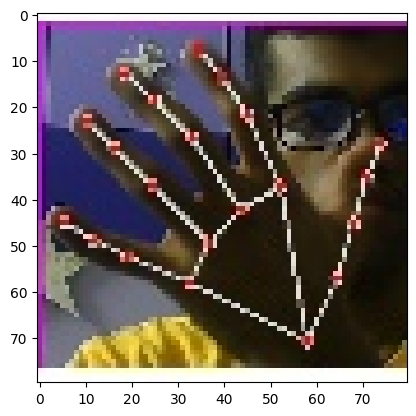

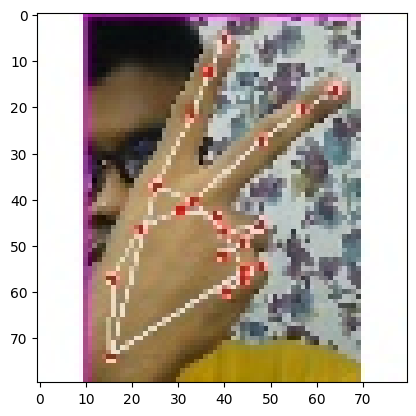

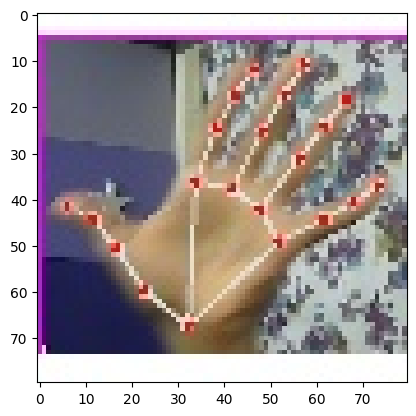

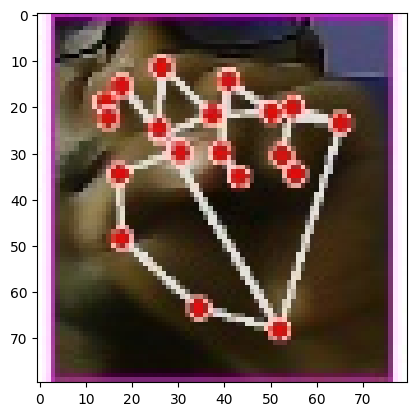

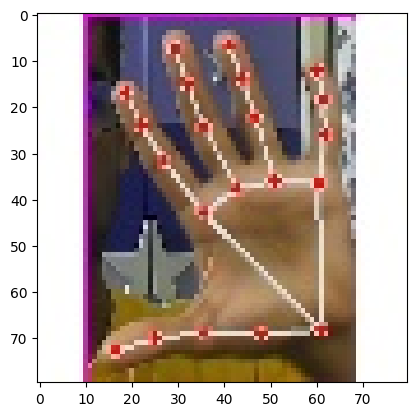

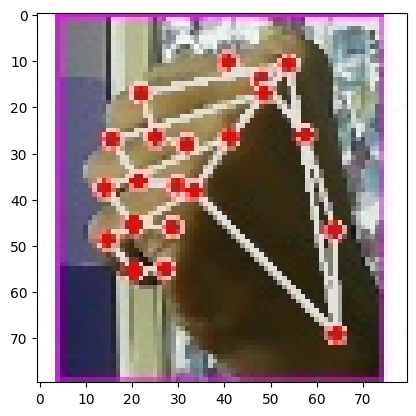

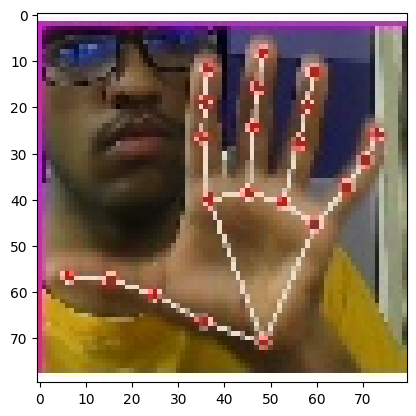

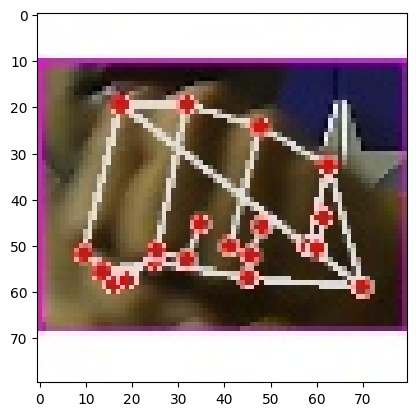

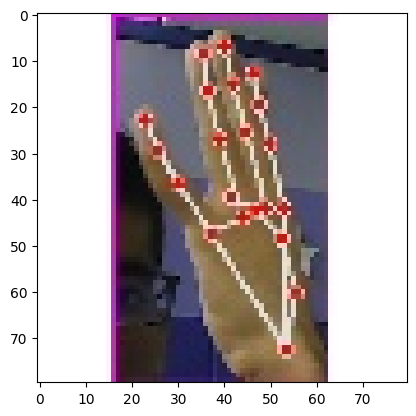

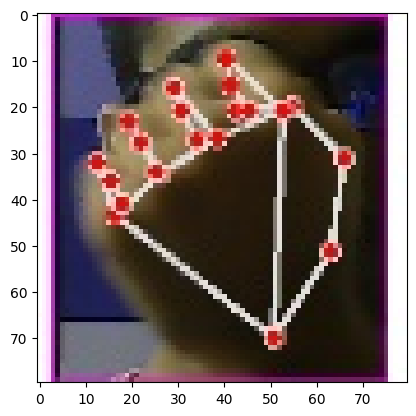

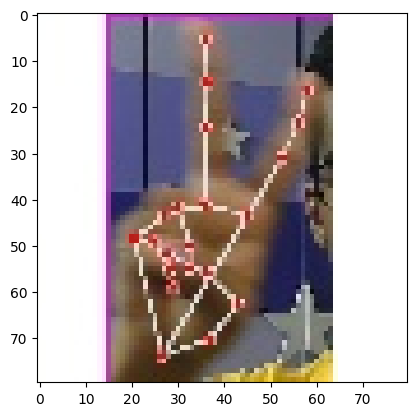

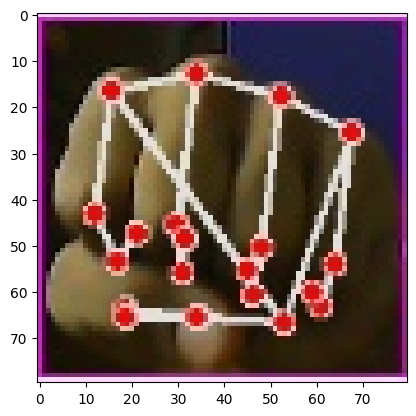

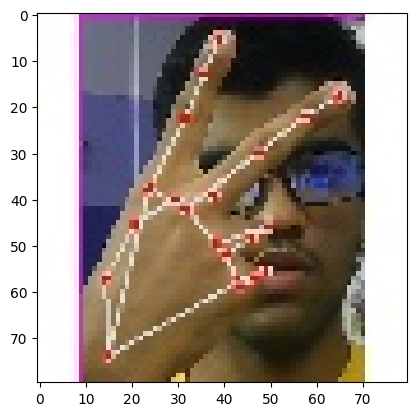

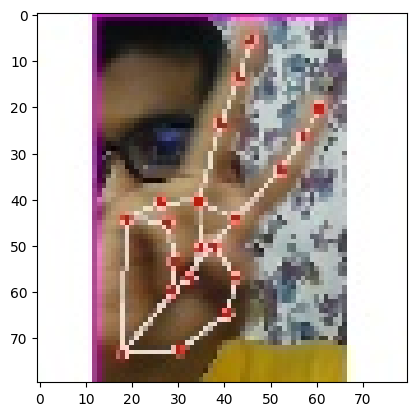

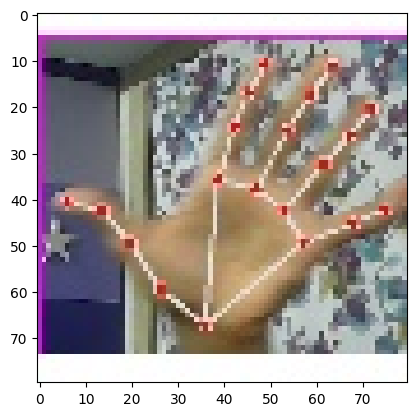

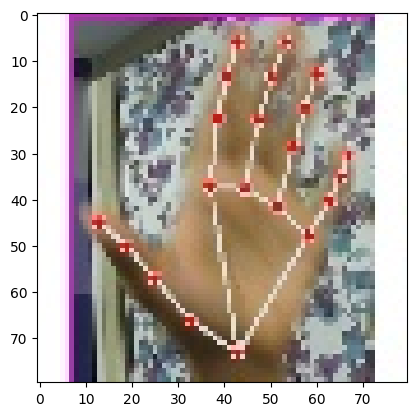

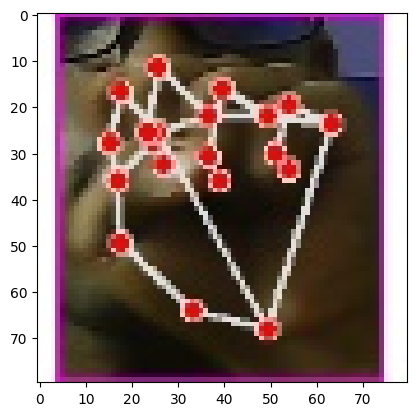

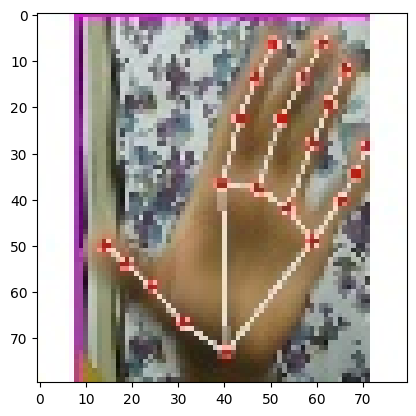

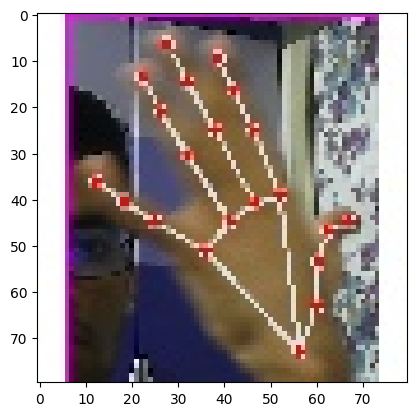

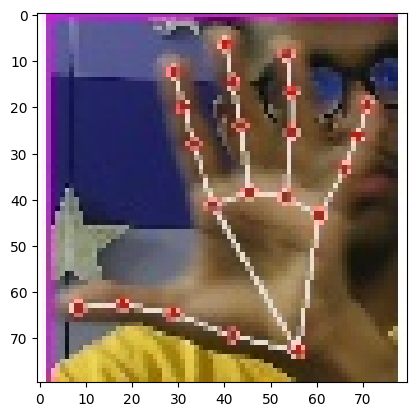

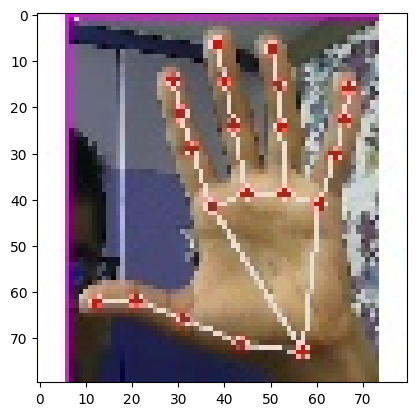

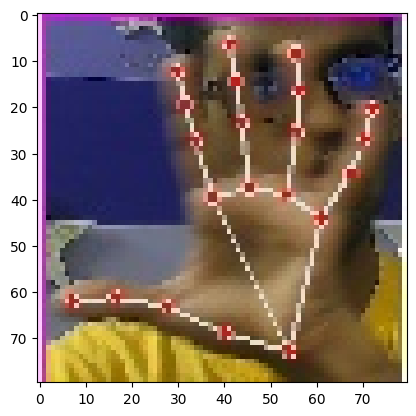

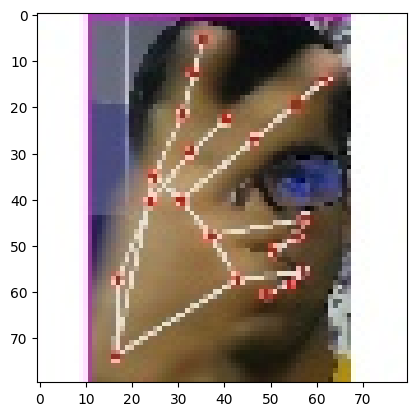

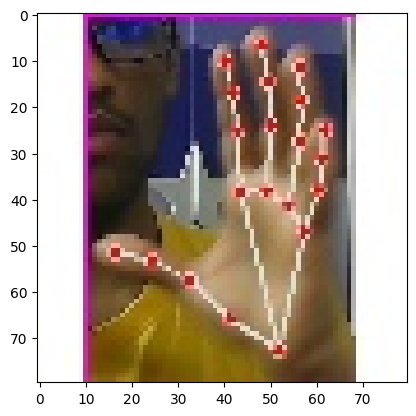

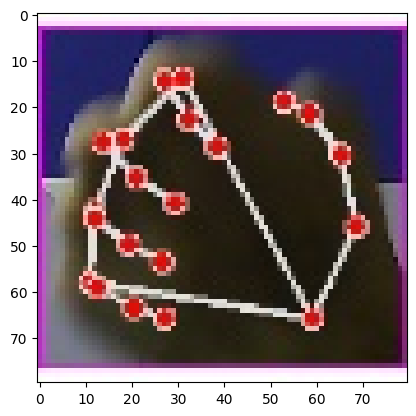

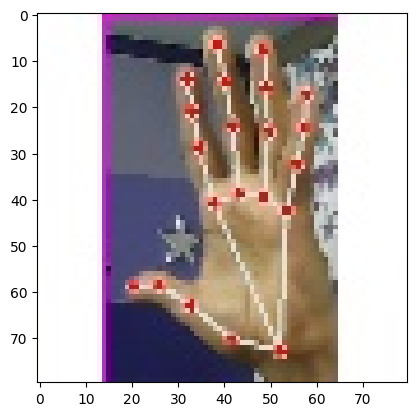

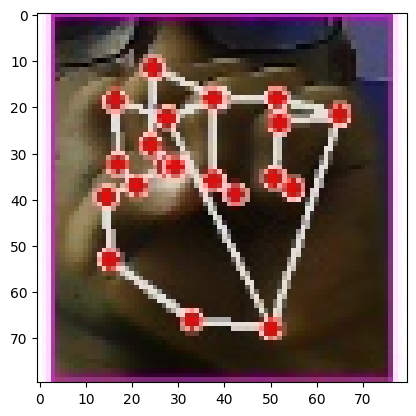

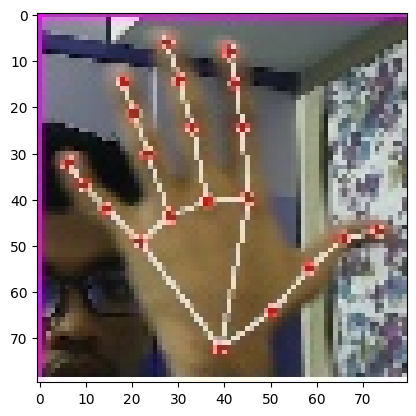

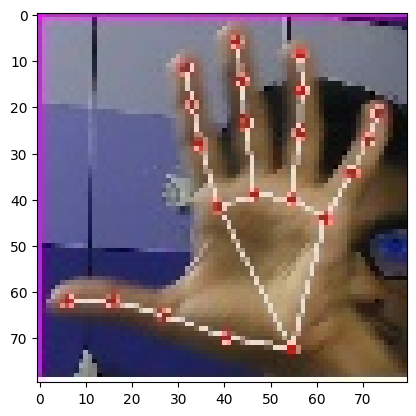

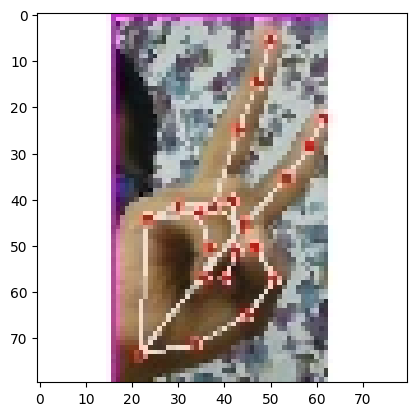

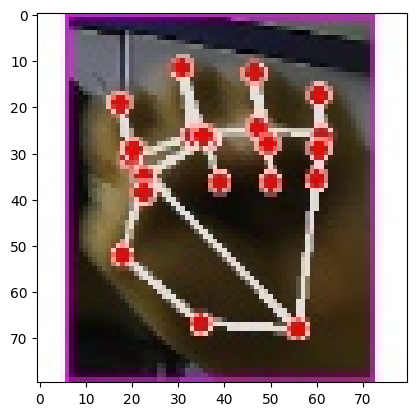

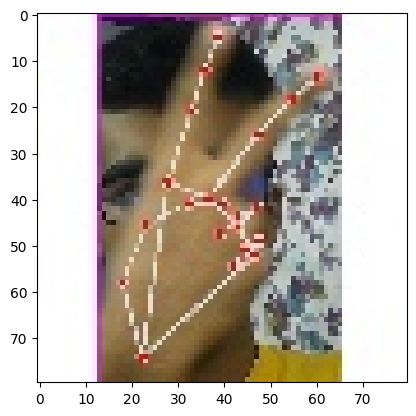

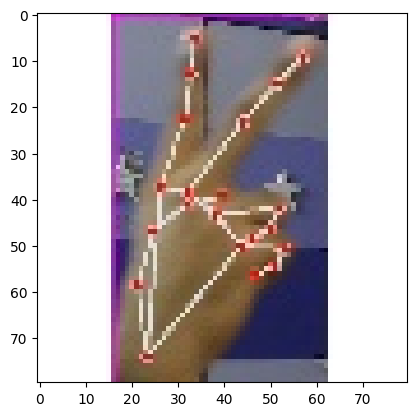

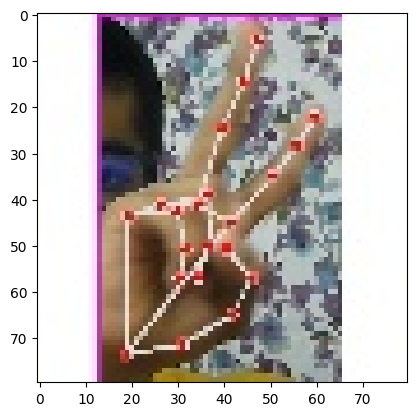

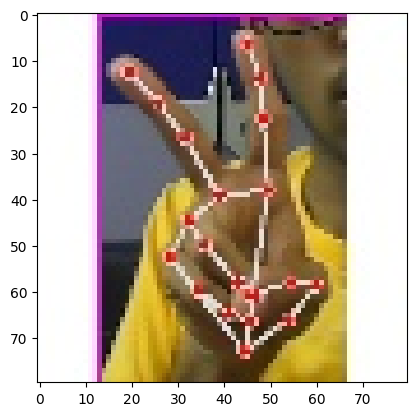

KeyboardInterrupt: 

In [49]:
for batch in val_flow:
    images, labels = batch
    plt.imshow(images[0])
    plt.show()
